In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

In [2]:
data = np.load('./Image_Classification/mnist_compressed.npz')

X_test, y_test, X_train, y_train =  data['test_images'], data['test_labels'], data['train_images'], data['train_labels']

In [3]:
def show_img(x, y):
    plt.gray()
    plt.title(str(y))
    plt.imshow(x)

In [4]:
model = load_model('./mnist_trained_weights.keras')

In [5]:
layer_names = [layer.name for layer in model.layers 
                      if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D))]

class = 54 conf= 1.0


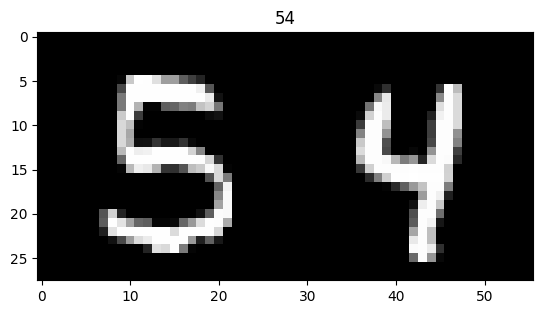

In [6]:
#we have 10k test so 0 - 9999
x = X_test[999]
y = y_test[999]
show_img(x , y)
x = x.reshape(1, 28, 56, 1)
predictions = model.predict(x, verbose=0)
# Get predicted class and confidence
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]
print('class =', predicted_class, 'conf=' , confidence)

In [7]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 56, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 28, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 14, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │       156,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,446 (1.81 MB)

 Trainable params: 158,148 (617.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 316,298 (1.21 MB)

##### CONV2D 1

In [8]:
desiredLayers = [0]
desiredOutputs = [model.layers[i].output for i in desiredLayers] 

newModel = Model(model.inputs, desiredOutputs)

layer_0 = newModel.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


d:\College\pccoe\5th sem\CV\Practicals\Final_practicals\venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_10']. Received: the structure of inputs=*
  warnings.warn(


In [9]:
layer_0.shape

(1, 28, 56, 8)

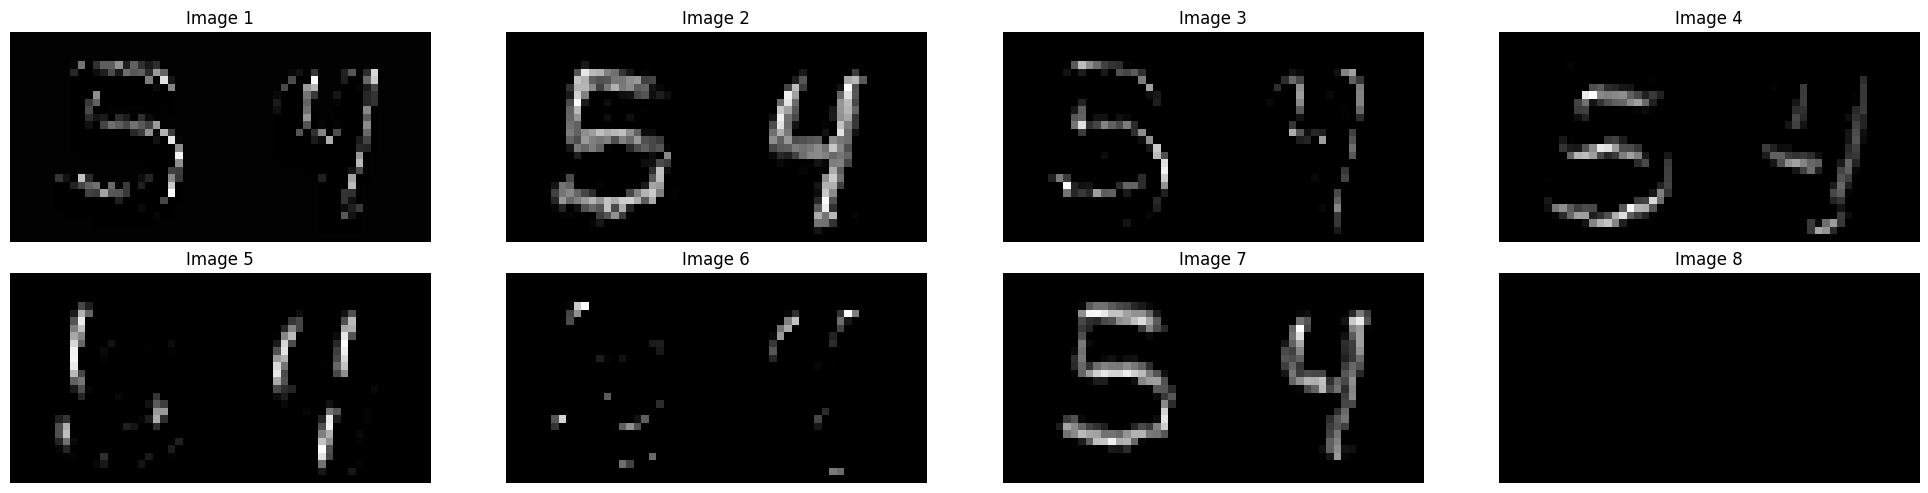

In [10]:
images = layer_0[0, :, :, :]

# Plotting the 8 grayscale images
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

##### MAX POOL 1

In [11]:
desiredLayers = [1]
desiredOutputs = [model.layers[i].output for i in desiredLayers] 

newModel = Model(model.inputs, desiredOutputs)

layer_1 = newModel.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [12]:
layer_1.shape

(1, 14, 28, 8)

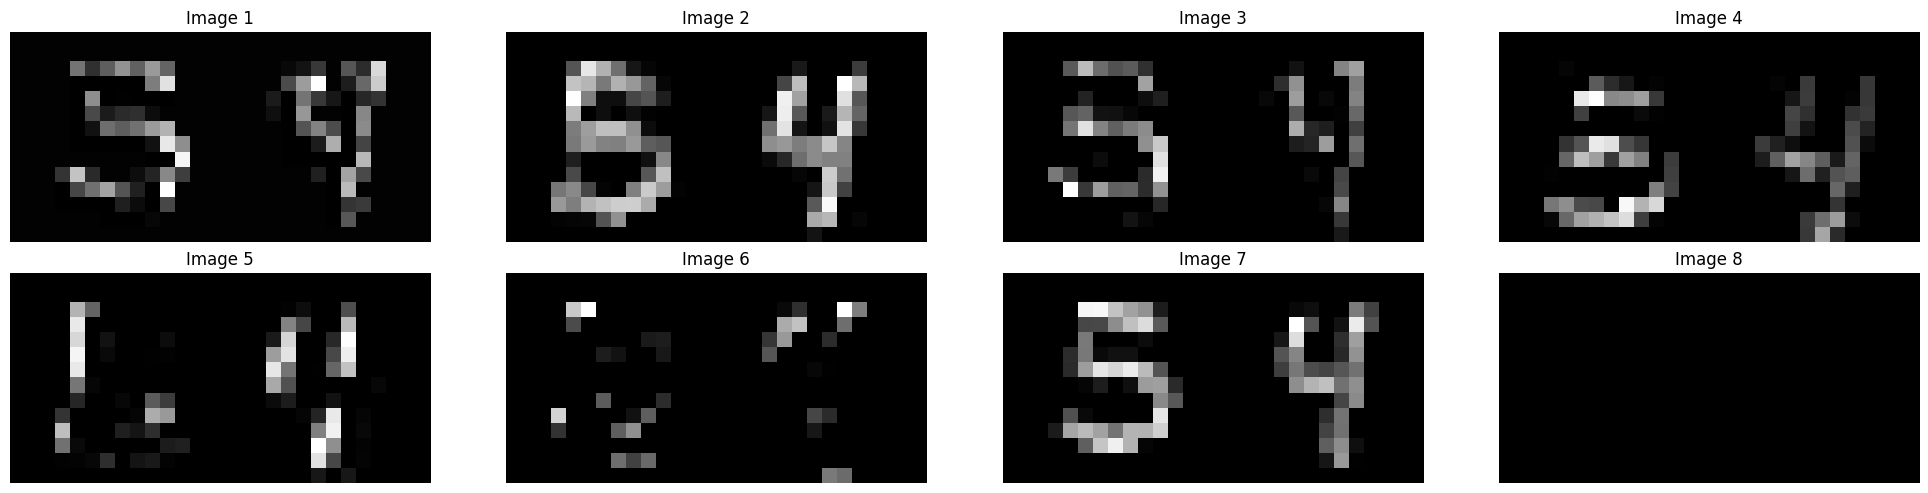

In [13]:
images = layer_1[0, :, :, :]

fig, axes = plt.subplots(2, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

#### CONV2D 2

In [14]:
desiredLayers = [2]
desiredOutputs = [model.layers[i].output for i in desiredLayers] 

newModel = Model(model.inputs, desiredOutputs)

layer_2 = newModel.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [15]:
layer_2.shape

(1, 14, 28, 16)

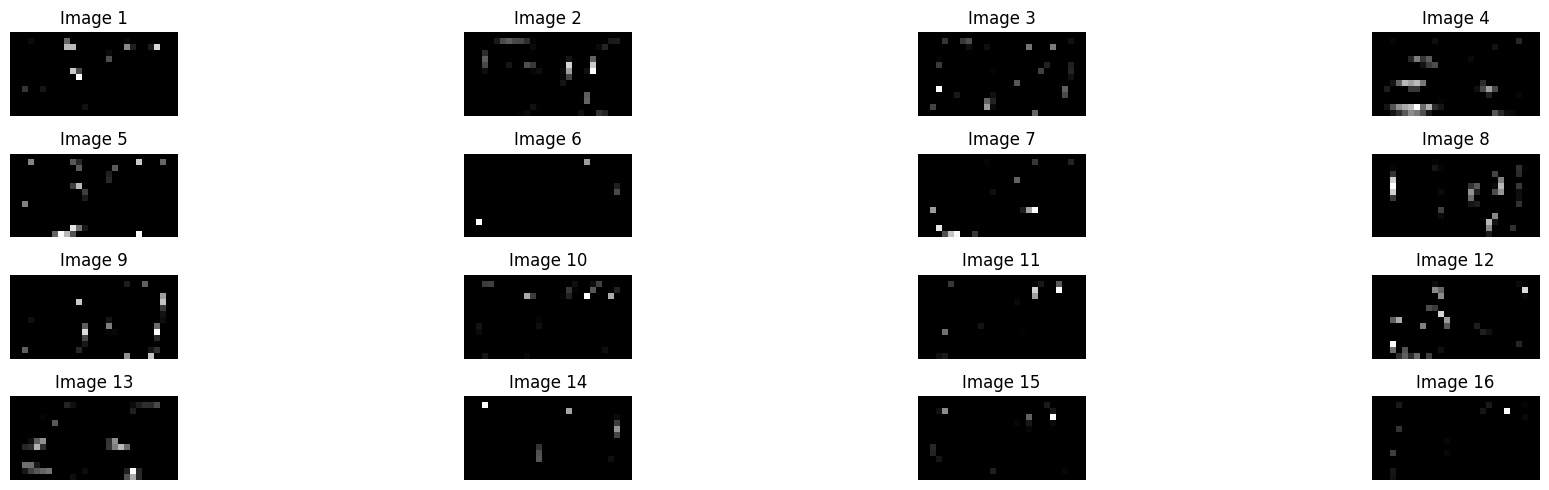

In [16]:
images = layer_2[0, :, :, :]

fig, axes = plt.subplots(4, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

#### MAX POOL 2

In [17]:
desiredLayers = [3]
desiredOutputs = [model.layers[i].output for i in desiredLayers] 

newModel = Model(model.inputs, desiredOutputs)

layer_3 = newModel.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [18]:
layer_3.shape

(1, 7, 14, 16)

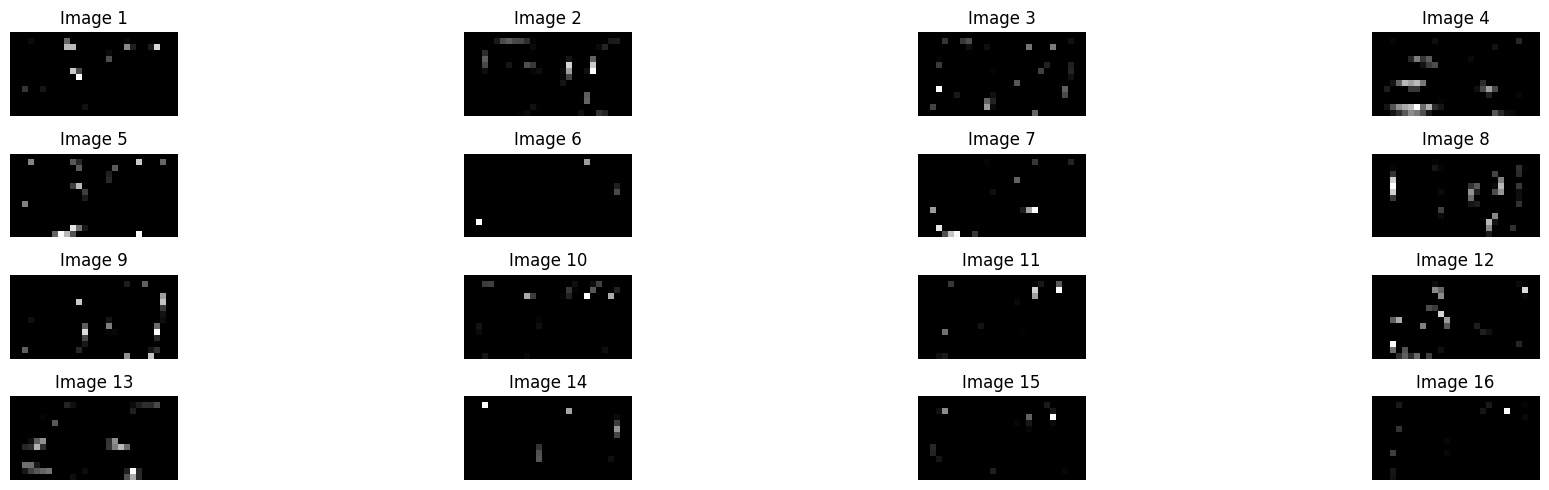

In [19]:
images = layer_2[0, :, :, :]

fig, axes = plt.subplots(4, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

#### FLATTEN

In [20]:
desiredLayers = [4]
desiredOutputs = [model.layers[i].output for i in desiredLayers] 

newModel = Model(model.inputs, desiredOutputs)

layer_4 = newModel.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [21]:
layer_4.shape

(1, 1568)

In [22]:
flattented = layer_4.flatten()

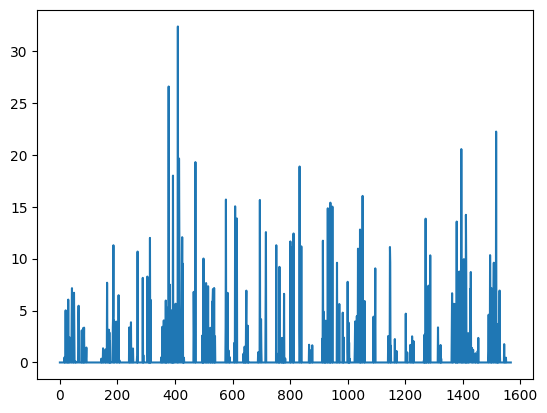

In [23]:
plt.plot(flattented)

In [24]:
desiredLayers = [5]
desiredOutputs = [model.layers[i].output for i in desiredLayers] 

newModel = Model(model.inputs, desiredOutputs)

layer_5 = newModel.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


In [25]:
layer_5.shape

(1, 100)

In [26]:
flattented_output = layer_5.flatten()

In [27]:
flattented_output.argmax()

np.int64(54)

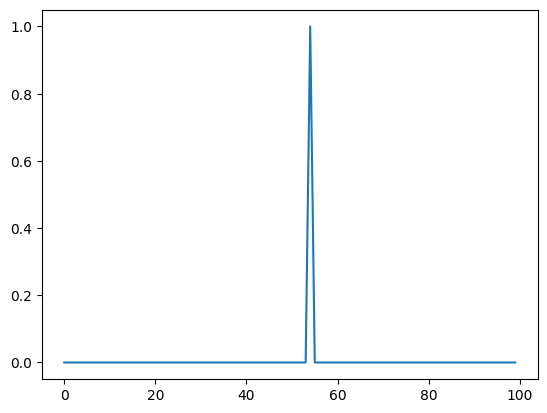

In [28]:
plt.plot(flattented_output)